In [1]:
import os
import sys

os.environ['PYSPARK_PYTHON'] = sys.executable
os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable

# RESOLVER PROBLEMA DE VERSÃO PYTHON X PYSPARK WORKERS

In [2]:
from pyspark.sql import SparkSession

from pyspark.sql.functions import *

from pyspark.sql.types import *

import pandas as pd

import matplotlib.pyplot as plt

In [3]:
# Create SparkSession 
spark = SparkSession.builder \
      .master("local[1]") \
      .appName("teste") \
      .getOrCreate()

In [4]:
df = spark.read.option("header",True) \
          .csv("relatorio_tratado.csv")
df.printSchema()
df.show()

root
 |-- categorias: string (nullable = true)
 |-- categoria_id: string (nullable = true)
 |-- nome2: string (nullable = true)
 |-- numero_serie: string (nullable = true)
 |-- condominio_id: string (nullable = true)
 |-- nome5: string (nullable = true)
 |-- testado: string (nullable = true)
 |-- data_instalacao: string (nullable = true)

+----------+------------+--------------+------------+-------------+-------------------+-------+---------------+
|categorias|categoria_id|         nome2|numero_serie|condominio_id|              nome5|testado|data_instalacao|
+----------+------------+--------------+------------+-------------+-------------------+-------+---------------+
|    CÂMERA|           1|NVR INTEL BRAS|    NVR12354|            3|        OBRA SOGECO|    SIM|      7/20/2016|
|    CÂMERA|           1|     CAMERA IP|     CR12856|            3|        OBRA SOGECO|    SIM|      7/20/2016|
|    CÂMERA|           1|     CAMERA IP|   CR1285614|            4|      ILHA DA LAGOA|    SIM|    

In [5]:
# Renomear Colunas
df = df.withColumnRenamed("categorias", "Categoria").withColumnRenamed("categoria_id", "Tipo_categoria").withColumnRenamed("nome2", "Equipamentos") \
.withColumnRenamed("condominio_id", "Tipo_condominio").withColumnRenamed("nome5", "Condominio").withColumnRenamed("data_instalacao", "Instalacao") 

df.show(5)

+---------+--------------+--------------+------------+---------------+---------------+-------+----------+
|Categoria|Tipo_categoria|  Equipamentos|numero_serie|Tipo_condominio|     Condominio|testado|Instalacao|
+---------+--------------+--------------+------------+---------------+---------------+-------+----------+
|   CÂMERA|             1|NVR INTEL BRAS|    NVR12354|              3|    OBRA SOGECO|    SIM| 7/20/2016|
|   CÂMERA|             1|     CAMERA IP|     CR12856|              3|    OBRA SOGECO|    SIM| 7/20/2016|
|   CÂMERA|             1|     CAMERA IP|   CR1285614|              4|  ILHA DA LAGOA|    SIM| 7/20/2016|
|   CÂMERA|             1|     CAMERA IP|       CR128|              5| LIRIO DO CAMPO|    SIM| 7/20/2016|
|   CÂMERA|             1|     CAMERA IP|  CR12856145|             10|CHARLES GARNIER|    SIM| 7/20/2016|
+---------+--------------+--------------+------------+---------------+---------------+-------+----------+
only showing top 5 rows



In [6]:
# Criar coluna com data atual
df = df.withColumn("Data_atual", current_date())
df.show(5)


+---------+--------------+--------------+------------+---------------+---------------+-------+----------+----------+
|Categoria|Tipo_categoria|  Equipamentos|numero_serie|Tipo_condominio|     Condominio|testado|Instalacao|Data_atual|
+---------+--------------+--------------+------------+---------------+---------------+-------+----------+----------+
|   CÂMERA|             1|NVR INTEL BRAS|    NVR12354|              3|    OBRA SOGECO|    SIM| 7/20/2016|2023-11-05|
|   CÂMERA|             1|     CAMERA IP|     CR12856|              3|    OBRA SOGECO|    SIM| 7/20/2016|2023-11-05|
|   CÂMERA|             1|     CAMERA IP|   CR1285614|              4|  ILHA DA LAGOA|    SIM| 7/20/2016|2023-11-05|
|   CÂMERA|             1|     CAMERA IP|       CR128|              5| LIRIO DO CAMPO|    SIM| 7/20/2016|2023-11-05|
|   CÂMERA|             1|     CAMERA IP|  CR12856145|             10|CHARLES GARNIER|    SIM| 7/20/2016|2023-11-05|
+---------+--------------+--------------+------------+----------

In [7]:
# Ver os tipos de categorias dentro da coluna e ordenar o Tipo_categoria
#df.select("Tipo_categoria").distinct().orderBy("Tipo_categoria").show()

In [6]:
#df_tratado = df.select("Categoria", "Equipamentos", "Condominio", "testado").orderBy("Categoria").show()
df_nao_testados = df.select("Categoria", "Equipamentos", "Condominio", "testado") \
                   .orderBy("Categoria") \
                   .where(df["testado"] == "NÃO")


df_nao_testados.show()

+---------+----------------+--------------+-------+
|Categoria|    Equipamentos|    Condominio|testado|
+---------+----------------+--------------+-------+
|INTERFONE|       ATA KHOMP|        TAMISA|    NÃO|
|INTERFONE|       ATA KHOMP|CASTEL DEL MAR|    NÃO|
|INTERFONE|       SIRENE GK|        DOMANI|    NÃO|
|   PORTÃO|HASTE PARA CERCA|PORTAL DO SOL |    NÃO|
|   PORTÃO|HASTE PARA CERCA| VILA DEL MARE|    NÃO|
|   PORTÃO|HASTE PARA CERCA|      FLORENÇA|    NÃO|
|   PORTÃO|HASTE PARA CERCA|     CASA NOVA|    NÃO|
|   PORTÃO|HASTE PARA CERCA|   DOM RODRIGO|    NÃO|
|   PORTÃO|HASTE PARA CERCA|PORTAL DO SOL |    NÃO|
|   SENSOR|       SIRENE GK|CASTEL DEL REY|    NÃO|
+---------+----------------+--------------+-------+



In [7]:
# Equipamentos Testados
df_nao_testados = df.select("Categoria", "Equipamentos", "Condominio", "testado") \
                   .orderBy("Categoria") \
                   .where(df["testado"] == "SIM")


df_nao_testados.show(df_nao_testados.count(), truncate=False)

+---------+--------------------+---------------------+-------+
|Categoria|Equipamentos        |Condominio           |testado|
+---------+--------------------+---------------------+-------+
|ACESSO   |ELETROIMÃ           |DOM RODRIGO          |SIM    |
|ACESSO   |ELETROIMÃ           |CLOUDE MONETE        |SIM    |
|ACESSO   |ELETROIMÃ           |CARRION DE LOS CONDES|SIM    |
|ACESSO   |ELETROIMÃ           |SCARP                |SIM    |
|ACESSO   |ELETROIMÃ           |PAPINE               |SIM    |
|ACESSO   |ELETROIMÃ           |MIRAI                |SIM    |
|ACESSO   |ELETROIMÃ           |CITTA DI PONTREMOLI  |SIM    |
|ACESSO   |ELETROIMÃ           |CARTAGO              |SIM    |
|ACESSO   |ELETROIMÃ           |IMPERIO DO FAROL     |SIM    |
|ACESSO   |ELETROIMÃ           |MAISON PARIS         |SIM    |
|CONEXÃO  |SWITCH SG           |CASTEL DEL REY       |SIM    |
|CONEXÃO  |SWITCH SG           |CARTAGO              |SIM    |
|CONEXÃO  |SWITCH 8P           |DOM RODRIGO          |S

In [8]:
contagem_testados = df.groupBy("testado").count()

# Mostrar o resultado da contagem
contagem_testados.show()

+-------+-----+
|testado|count|
+-------+-----+
|    NÃO|   10|
|    SIM|   90|
+-------+-----+



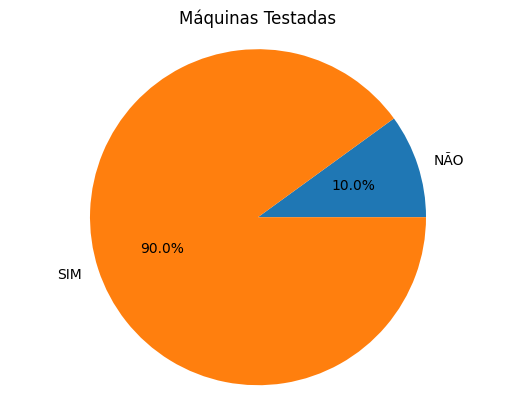

In [9]:
# Converter o DataFrame do Spark para o Pandas
pandas_df = contagem_testados.toPandas()


plt.pie(pandas_df['count'], labels=pandas_df['testado'], autopct='%1.1f%%')
plt.axis('equal') 
plt.title('Máquinas Testadas')
plt.show()

In [12]:
# Contar o número de máquinas em cada condomínio e colocar por odem decrescente
contagem_maquinas_por_condominio = df.groupBy('Condominio').count().withColumnRenamed('count', 'quantidade').orderBy('quantidade', ascending=False)

# Mostrar o resultado da contagem
contagem_maquinas_por_condominio.show(contagem_maquinas_por_condominio.count(), truncate=False)


+---------------------+----------+
|Condominio           |quantidade|
+---------------------+----------+
|VILA DEL MARE        |3         |
|KARUNA               |3         |
|PORTO FINO           |3         |
|SCARP                |3         |
|VIVART               |3         |
|MIRAI                |3         |
|CASTEL DEL MAR       |3         |
|LIRIO DO CAMPO       |3         |
|CHARLES GARNIER      |3         |
|PORTAL DO SOL        |3         |
|DOM RODRIGO          |3         |
|COSTA NOVA           |3         |
|OBRA SOGECO          |3         |
|EDMILSON PONTES      |2         |
|LIBERTY              |2         |
|AREIAS DE PRATA      |2         |
|PIAZZA REALE         |2         |
|CASTEL DEL REY       |2         |
|PIAZZA SAN MARCO     |2         |
|CARRION DE LOS CONDES|2         |
|CASA NOVA            |2         |
|TAMISA               |2         |
|CARTAGO              |2         |
|ARUBA                |2         |
|ILHA DA LAGOA        |2         |
|CLOUDE MONETE      

In [13]:
# Contar o número de máquinas em cada condomínio
contagem_maquinas_por_condominio = df.groupBy('Condominio').count()

# Ordenar o DataFrame pela contagem em ordem decrescente
contagem_maquinas_ordenado = contagem_maquinas_por_condominio.orderBy('count', ascending=False)

# Coletar o valor máximo da contagem de máquinas
max_qtde_maquinas = contagem_maquinas_ordenado.first()['count']

# Exibir somente os condomínios com a maior quantidade de máquinas
contagem_maquinas_ordenado.filter(col("count") == max_qtde_maquinas).show()



+---------------+-----+
|     Condominio|count|
+---------------+-----+
|  VILA DEL MARE|    3|
|         KARUNA|    3|
|     PORTO FINO|    3|
|          SCARP|    3|
|         VIVART|    3|
|          MIRAI|    3|
| CASTEL DEL MAR|    3|
| LIRIO DO CAMPO|    3|
|CHARLES GARNIER|    3|
| PORTAL DO SOL |    3|
|    DOM RODRIGO|    3|
|     COSTA NOVA|    3|
|    OBRA SOGECO|    3|
+---------------+-----+



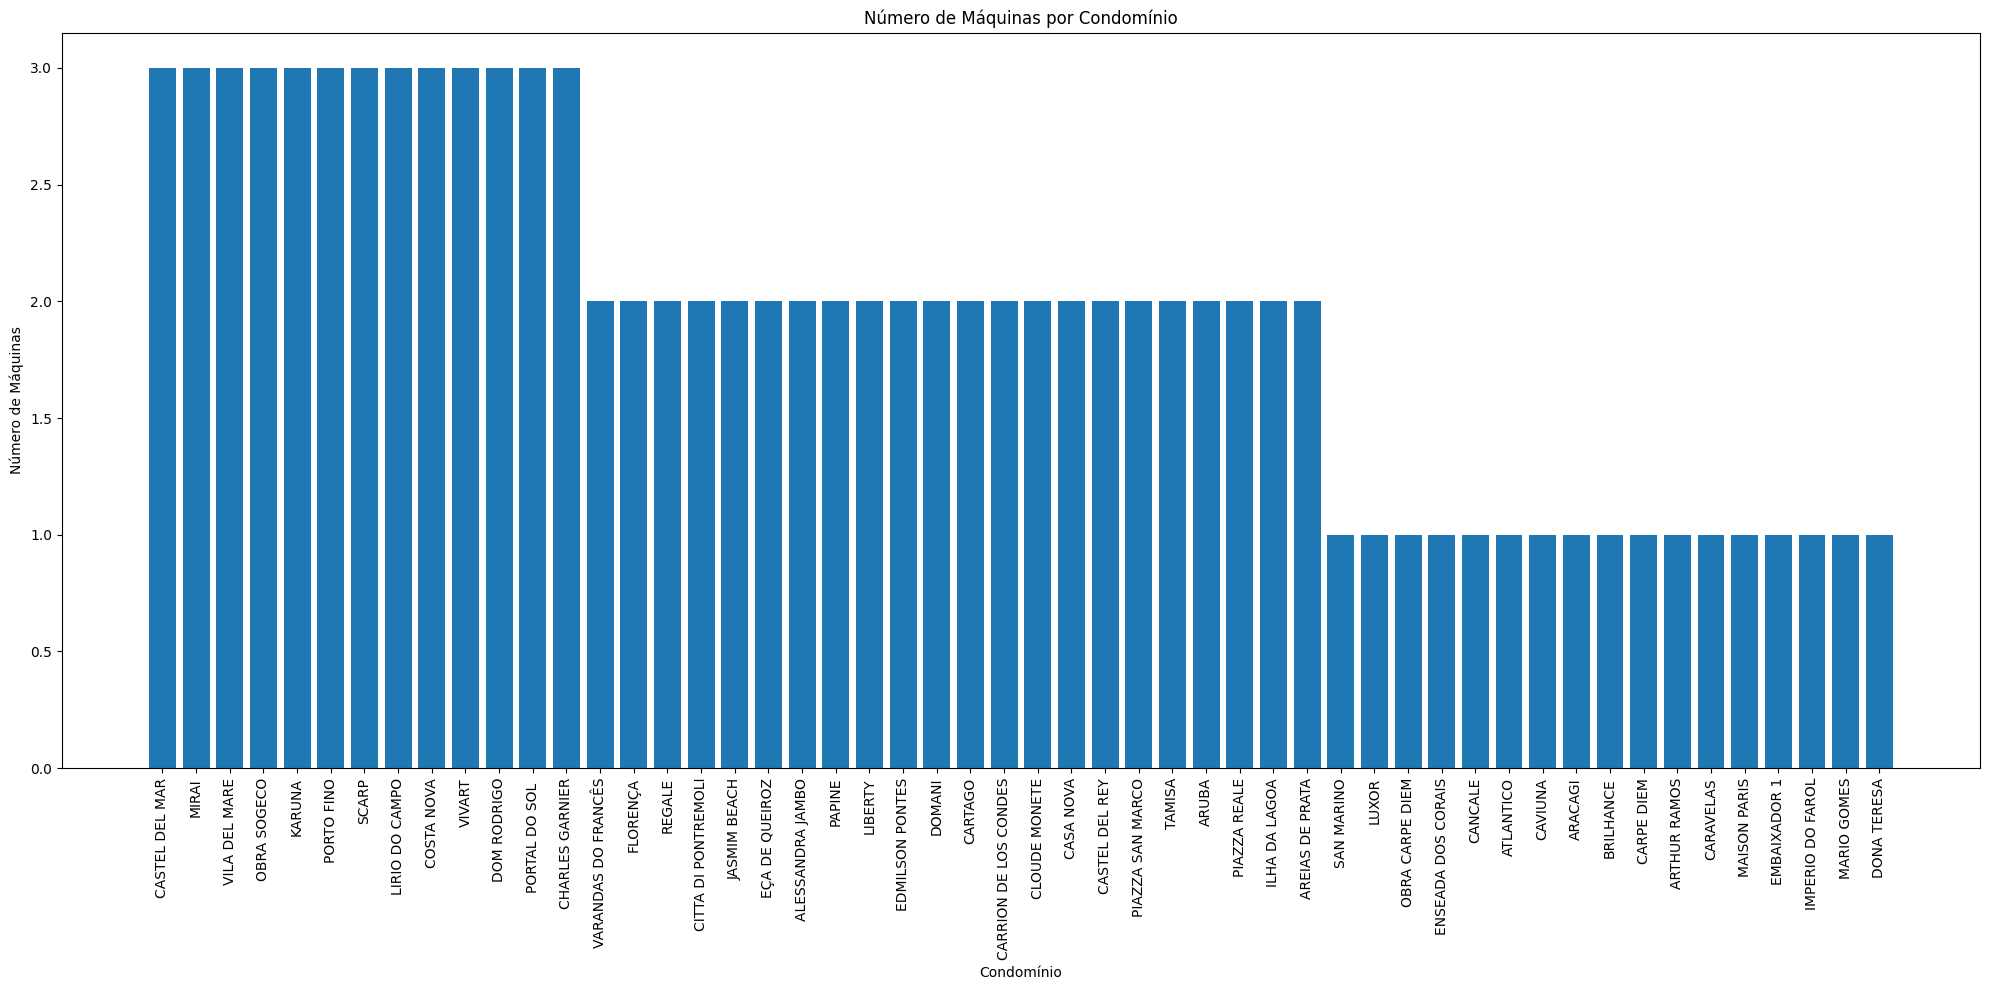

In [14]:
# Converter o DataFrame do Spark para o Pandas
pandas_contagem_maquinas = contagem_maquinas_por_condominio.toPandas()

# Ordenar o DataFrame por contagem (opcional)
pandas_contagem_maquinas = pandas_contagem_maquinas.sort_values(by='count', ascending=False)

# Plotar o gráfico de barras
plt.figure(figsize=(20, 10))  # Ajustar o tamanho do gráfico (opcional)
plt.bar(pandas_contagem_maquinas['Condominio'], pandas_contagem_maquinas['count'])
plt.xlabel('Condomínio')
plt.ylabel('Número de Máquinas')
plt.title('Número de Máquinas por Condomínio')
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x (opcional para legibilidade)
plt.tight_layout()  # Ajustar o layout para evitar cortes
plt.show()


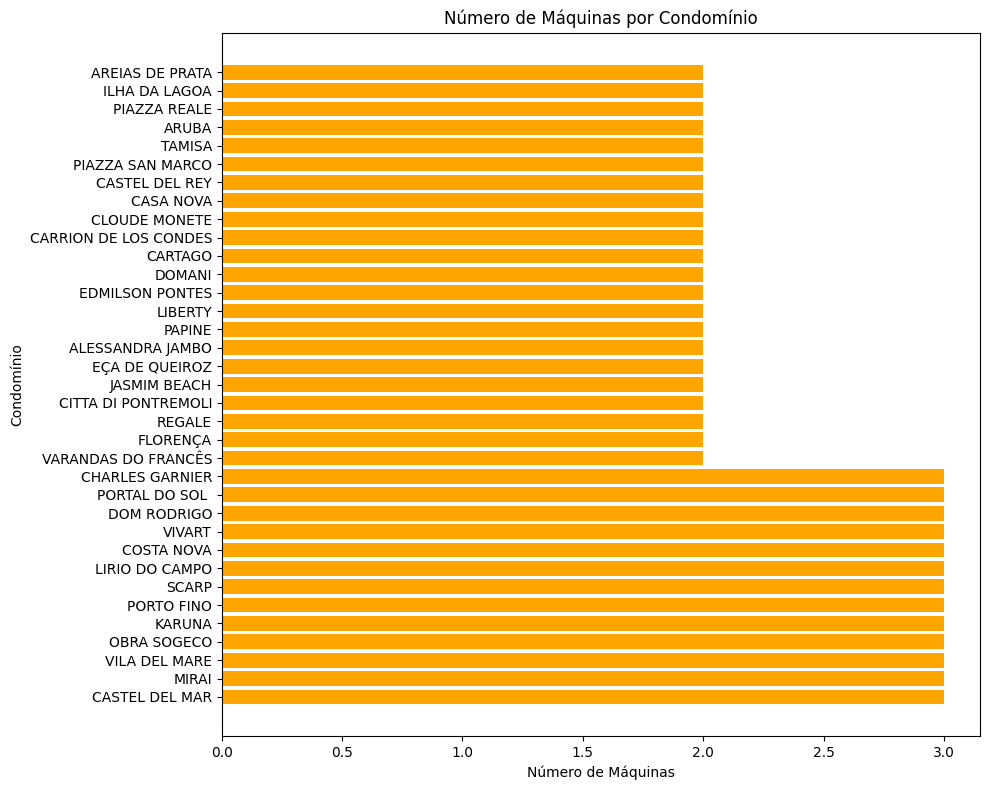

In [25]:
# Filtrar valores fracionados
pandas_contagem_maquinas = pandas_contagem_maquinas[pandas_contagem_maquinas['count'] > 1]

# Plotar o gráfico de barras horizontal
plt.figure(figsize=(10, 8))
plt.barh(pandas_contagem_maquinas['Condominio'], pandas_contagem_maquinas['count'], color='skyblue')
plt.xlabel('Número de Máquinas')
plt.ylabel('Condomínio')
plt.title('Número de Máquinas por Condomínio')
plt.tight_layout()
plt.show()


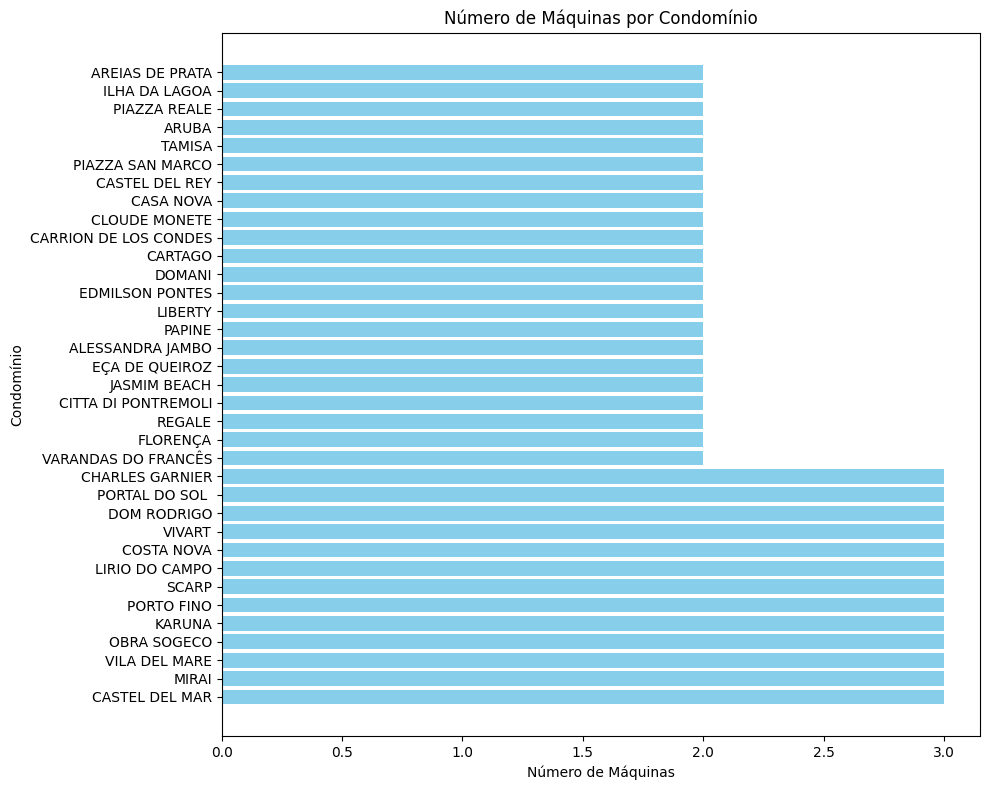

In [26]:
# Plotar o gráfico de barras horizontal
plt.figure(figsize=(10, 8))  # Tamanho da figura (opcional)
plt.barh(pandas_contagem_maquinas['Condominio'], pandas_contagem_maquinas['count'], color='skyblue')
plt.xlabel('Número de Máquinas')
plt.ylabel('Condomínio')
plt.title('Número de Máquinas por Condomínio')
plt.tight_layout()  # Ajuste do layout para evitar cortes (opcional)
plt.show()

